In [10]:
import os
import pandas as pd
import numpy as np
import torch as th
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import itertools
import collections
import sys
from torch.utils.data import DataLoader

sys.path.insert(1, '../Scripts')
import distance_functions as dFun
import utilities_functions as uFun
import visualization_functions as vFun
import evaluator as eFun

In [11]:
cr_seen = ['MMD_cdt', 'CorrD', 'CndD']
cr_unseen = ['MMD_Fr', 'BinnedD', 'CorrD_N', 'NpMom', 'EDF_Mrg']
cr_names = cr_mixed = cr_seen + cr_unseen
#['MMD_cdt', 'MMD_Fr', 'CorrD', 'BinnedD', 'CorrD_N', 'NpMom', 'CndD', 'EDF_Mrg']

container = uFun.prepare_results(
    results_dir='../Results/', 
    data_dir='../Data/', 
    cr_names=cr_mixed,
    weight_cr=True,  
    reduction='mean',
    handle_outliers=True,
)
df = uFun.container_to_df(container)

df_sep_perfs = uFun.get_separate_performances(
    results_dir='../Results/', 
    data_dir='../Data/', 
    weight_cr=True, 
    reduction='mean',
    handle_outliers=True,
)

nl_dict = {
    'c500':'MCC', 'c28':'SLM', 'c700':'SCC', 'c27':'SDM', 'c51':'VIA', 'c600':'VIM', 'c35':'NSS', 'c24':'CCC', 
    'c16':'SAT', 'c39':'NCP', 'c56':'TCC', 'c50':'CCS', 'c55':'ACC', 'c2': 'OOC', 'c36':'LSO', 'c3':'SOC', 
    'c17':'SLO', 'c22':'SLC', 'c0':'DIS',}
ln_dict = {v: k for k, v in nl_dict.items()}

labels1 = ['SAT', 'MCC', 'SLM', 'SDM', 'SCC', 'NSS', 'VIM', 'CCC', 'DIS']
names1  = [ln_dict[l] for l in labels1]
#labels2 = ['NCP', 'TCC', 'ACC', 'VIA', 'LSO', 'SLC', 'SLO', 'CCS', 'OOC', 'SOC']
#names2  = [ln_dict[l] for l in labels2]
labels = labels1; names = names1


df1 = df.set_index('cand_name').loc[names1,:]
df1['label'] = labels1
df1 = df1.set_index('label')
container1 = {nl_dict[k]:v for k,v in container.items() if k in names1}
for key in container1.keys():
    container1[key]['syn_data'] = th.Tensor(pd.read_csv(container1[key]['syn_link']).values[:, :4])

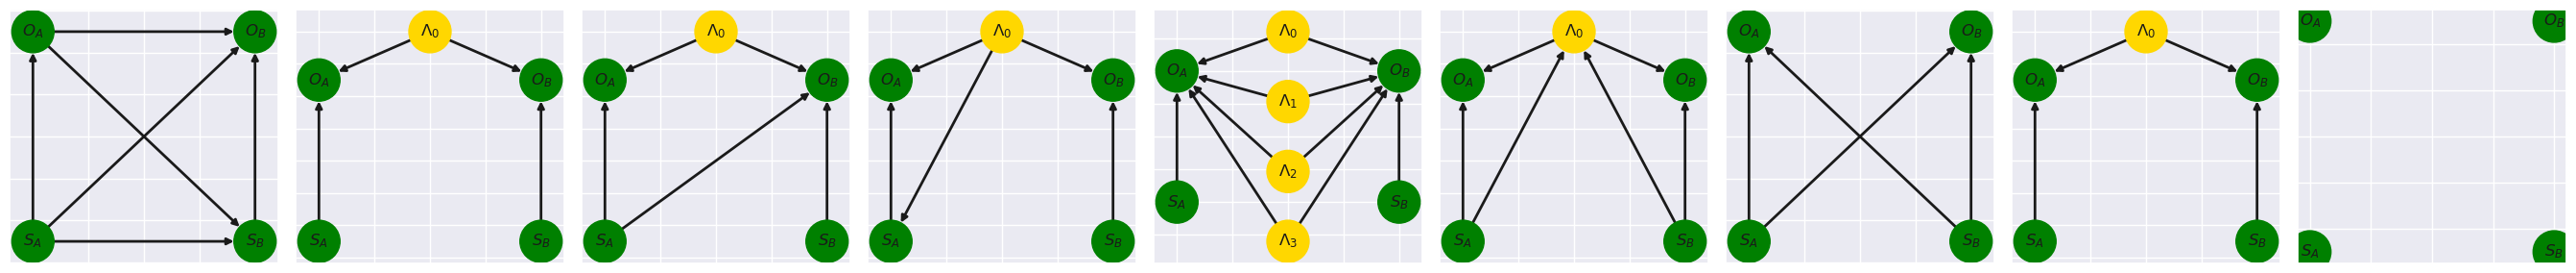

In [12]:
vFun.visualize_adjacency(
    [container[c]['adjacency'] for c in names1], 
    saving_path=None, 
    figsize_single=(3,3),
)

### Loss Portions

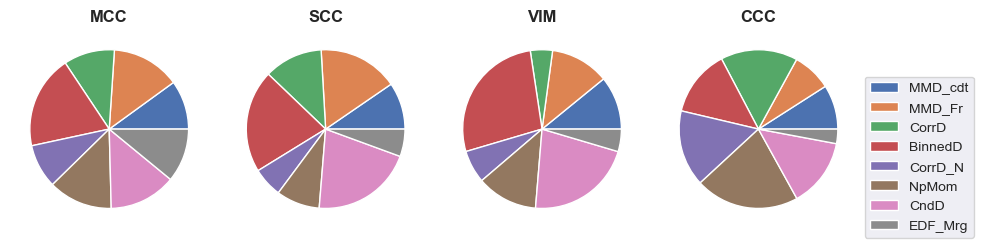

In [13]:
labels = ['MCC', 'SCC' , 'VIM', 'CCC']

fig, axes = plt.subplots(1, len(labels), figsize=(10, 4), tight_layout=True, sharey=True, sharex=True,)

for index, label in enumerate(labels):
    name = ln_dict[label]
    loss_te_link = list(df[df.cand_name==name].loss_te_link)[0]
    df_loss = pd.read_csv(loss_te_link)
    ax = axes[index]
    ax.set_title(label, weight='bold')
    vFun.plot_loss_portions(
        df_loss=df_loss, 
        ax=ax)
axes[-1].legend(list(df_loss.columns), fontsize=10, bbox_to_anchor=(1, .8))
#plt.savefig('../Plots/loss_portions.png', dpi=300,)
plt.show()
plt.close()

### conditioal independence tests

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
n_points = 15000

pval_dict = vFun.plot_indep_tests(
    data_org[:n_points, :], 
    test_type=2, 
    ax=ax, 
    num_perm=100, 
    marker='*', 
    color='#008001',
    label='Original',
)

pval_dict = vFun.plot_indep_tests(
    data_mcc[:n_points, :], 
    test_type=2, 
    ax=ax, 
    num_perm=100, 
    marker='.', 
    color='#165C8D',
    label='MCC',
)

pval_dict = vFun.plot_indep_tests(
    data_ccc[:n_points, :],
    test_type=2, 
    ax=ax, 
    num_perm=100, 
    marker='.', 
    color='#BA0100',
    label='CCC',
)
ax.legend()
ax.set_xticks(np.arange(len(pval_dict)), pval_dict.keys(), rotation=20, fontsize=12)
plt.savefig('../Plots/citests_merged.png', dpi=300)
plt.show()
plt.close()

### Comparision with Daley 

In [ ]:
labels = ['MCC', 'SLM', 'SDM', 'CCC']
names = [ln_dict[l] for l in labels]

fig, ax = plt.subplots(1, 1, figsize=(6, 3), tight_layout=True)

vFun.plot_candidate_losses(
    df=df,
    cand_names=names,
    labels=labels,
    datasets=['tr', 'te'],#'va'
    show_errors=True,
    ax=ax,
    saving_path='../Plots/daley_comparsion.png',
)

### Decompose Condtionals

/Users/omid/Documents/GitHub/Causality/empiricalCausality/CGNN/Notebooks/../Scripts/utilities_functions.py:228: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dstr = th.tensor(dstr)
/Users/omid/Documents/GitHub/Causality/empiricalCausality/CGNN/Notebooks/../Scripts/utilities_functions.py:228: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dstr = th.tensor(dstr)
/Users/omid/Documents/GitHub/Causality/empiricalCausality/CGNN/Notebooks/../Scripts/utilities_functions.py:228: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dstr = th.tensor(dstr)
/

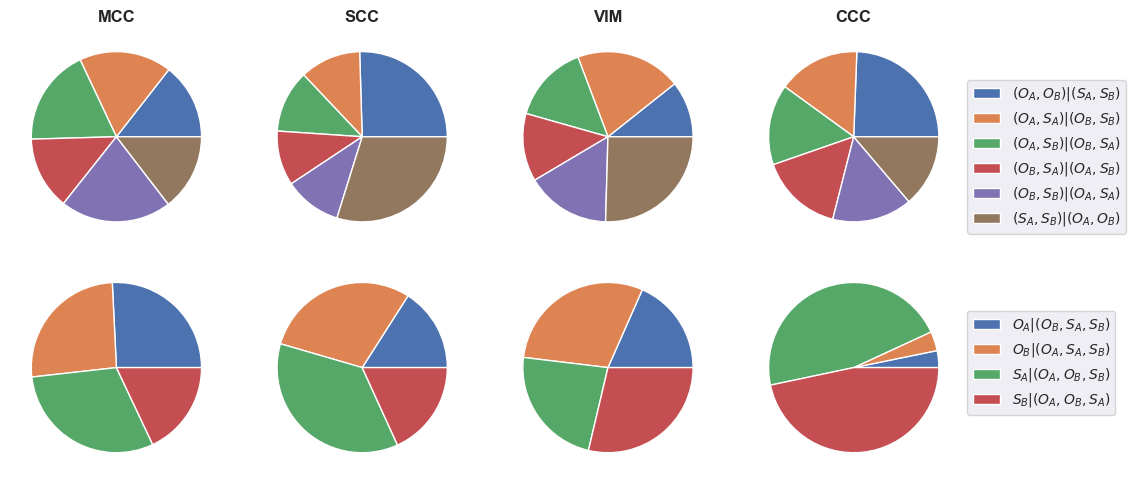

In [20]:
#labels = ['MCC' , 'NCP', 'SLM', 'SCC' , 'SDM', 'VIA', 'VIM' , 'NSS', 'CCC']
#labels = ['SAT', 'TCC', 'CCS', 'ACC', 'OOC', 'LSO', 'SLO', 'SOC', 'SLC', 'DIS']
labels = ['MCC', 'SCC' , 'VIM', 'CCC']

sampling_rate=4

fig, axes = plt.subplots(2, len(labels), figsize=(12, 5), tight_layout=True, sharey=True, sharex=True,)

for index, label in enumerate(labels):
    name = ln_dict[label]
    syn_link = list(df[df.cand_name==name].syn_link)[0]
    data_pred = pd.read_csv(syn_link).values[:, :4]
    ax = axes[0, index]
    ax.set_title(label, weight='bold')
    distances = vFun.plot_conditionals(
        data_true=data_org,
        data_pred=data_pred,
        sampling_rate=sampling_rate, 
        corr_type='(2,2)',
        ax=ax,
    )
axes[0, -1].legend(list(distances.keys()), fontsize=10, bbox_to_anchor=(1, .8))

for index, label in enumerate(labels):
    name = ln_dict[label]
    syn_link = list(df[df.cand_name==name].syn_link)[0]
    data_pred = pd.read_csv(syn_link).values[:, :4]
    ax = axes[1, index]
    distances = vFun.plot_conditionals(
        data_true=data_org,
        data_pred=data_pred,
        sampling_rate=sampling_rate, 
        corr_type='(1,3)',
        ax=ax,
    )
axes[1, -1].legend(list(distances.keys()), fontsize=10, bbox_to_anchor=(1, .8))

plt.savefig('../Plots/other_ideas/conditional_portions.png', dpi=300)
plt.show()
plt.close()

### Conditional performance with verying sampling rates

In [ ]:
vFun.plot_varying_rate_performance(
    data_t = data_org,
    data_q = data_mcc,
    data_c = data_ccc,
    sampling_rates=list(range(3, 20)),
    saving_path='../Plots/varying_rate_performance.png',
)

### Different loss categories

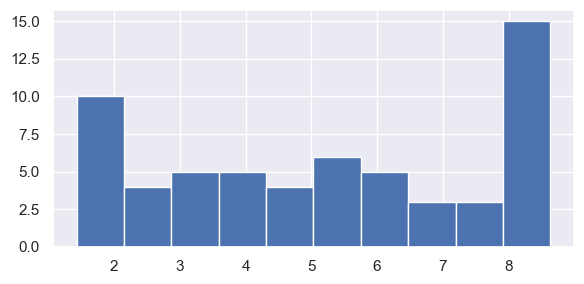

In [15]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
counts, bins, plot = ax.hist(df['loss_te'], bins=10)
plt.show()
plt.close()

### Regression on cr_weights

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

cr_tr = ['MMD_cdt', 'CorrD', 'CndD']
X = loss_va_scc[cr_tr].values
y = loss_tr_scc.values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
reg = LinearRegression()
#reg = TweedieRegressor(power=0, alpha=0.5, link='auto')
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.coef_/np.abs(reg.coef_).sum())

### Calibrate Distances

In [ ]:
criteria = [
    dFun.MMD_cdt(bandwidth=[1]), 
    dFun.MMD_Fourier(bandwidths=[0.1, 1, 10, 100], n_RandComps=100),
    dFun.CorrD([1, 1], 3),
    dFun.BinnedD('JS', 4),
    dFun.CorrD_N(),
    dFun.NpMom(num_moments=3, weighting_exp=2),
    dFun.CndD(sample_weighting=True, sampling_rate=3, num_std_moments=4, weighting_exp=1),
    dFun.EDF_Marg('AD'),
]

list_dict = []
for i in range(100):
    wg_dict_all = eFun.get_cr_weights(criteria,'..')
    list_dict.append(wg_dict_all)
df_wg = pd.DataFrame(list_dict)
wg_dict_all = df_wg.mean(0).to_dict()
df_wg.to_csv('../Data/calib_wg.csv', index=False)

In [ ]:
labels = ['MCC', 'SAT', 'SLM', 'SDM', 'SCC', 'NSS', 'VIM', 'CCC', 'DIS']
names = [ln_dict[l] for l in labels]
#################################################
vFun.plot_stacked_loess(
    df=df, 
    cand_names=names, 
    cand_labels=labels,
    cr_names=cr_seen+cr_unseen,
    weight_cr=False,
    saving_path='../Plots/performance_overview.png',
)

#################################################
fig, ax = plt.subplots(1, 1, figsize=(10, 3), tight_layout=True)
vFun.plot_candidate_losses(
    df=df,
    cand_names=names,
    labels=labels,
    datasets=['tr', 'te'],
    show_errors=True,
    ax=ax,
    saving_path='../Plots/performance_datasets.png',
)
plt.show()
plt.close()
#################################################
fig, ax = plt.subplots(1, 1, figsize=(10, 3), tight_layout=True)
vFun.visualize_separate_performances(
    df_sep_perfs=df_sep_perfs,
    cand_names=names, 
    labels=labels, 
    criteria_sets=['seen', 'unseen', 'mixed'],
    show_errors=True, 
    ax=ax, 
    saving_path='../Plots/performance_measures.png',
)

plt.show()
plt.close()

### Candidates Pictures

In [ ]:
for name, label in zip(names1, labels1):
    print(name, label)
    vFun.visualize_adjacency(
        [container[name]['adjacency']], 
        saving_path=f'../Plots/candidates/graph_{label.lower()}.png',
        figsize_single=(3,3),
    )